## Lab: Regularization
Author: Maria George (gmaria@uw.edu)

Date: 08 Feb 2017

Course: INFX 574: Machine Learning & Econometrics

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [2]:
# Loading the boston data
from sklearn.datasets import load_boston
bdata = load_boston()

### Splitting the dataset into training and test data
Split data into train and test parts (66% and 33%)

In [3]:
np.random.seed(seed=13579)
## create a data frame out of dataset
bdf=pd.DataFrame(bdata.data)
bdf.columns=bdata.feature_names
bdf['MEDV']=bdata.target
bdf = bdf.sample(50)

n = bdf.shape[0]
rand_order = np.arange(0,n)
np.random.shuffle(rand_order)

features = bdf["RM"].values.reshape((n,1))

#training data: 0:0.66n
boston_X_train = features[rand_order[:int(n*.66)],:]
boston_y_train = bdf["MEDV"].values.reshape((n,1))[rand_order[:int(n*.66)]]
# order X and y according to increasing x
boston_y_train = np.array([_y for _x, _y in sorted(zip(boston_X_train, boston_y_train))])
boston_X_train = np.array([_x for _x in sorted(boston_X_train)])

#test data 0.66n:end
boston_X_test = features[rand_order[int(n*.66):],:]
boston_y_test = bdf["MEDV"].values.reshape((n,1))[rand_order[int(n*.66):]]
# order X and y according to increasing x
boston_y_test = np.array([_y for _x, _y in sorted(zip(boston_X_test, boston_y_test))])
boston_X_test = np.array([_x for _x in sorted(boston_X_test)])

print ("Data partitions created")
print (boston_X_train.shape, boston_y_train.shape)
print (boston_X_test.shape, boston_y_test.shape)

Data partitions created
(33, 1) (33, 1)
(17, 1) (17, 1)


### Simple Linear Regression

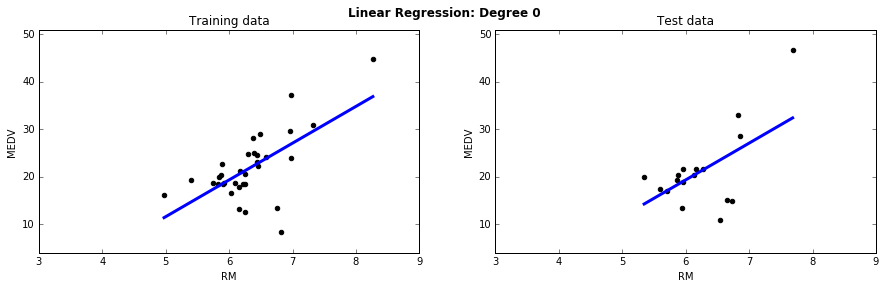

In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model
regr.fit(boston_X_train.reshape(len(boston_X_train),1), boston_y_train.reshape(len(boston_y_train),1))

# Plot outputs
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Linear Regression: Degree 0',fontweight='bold', fontsize = 12)
plt.subplot(121)
plt.scatter(boston_X_train, boston_y_train,  color='black')
plt.plot(boston_X_train, regr.predict(boston_X_train.reshape(len(boston_X_train),1)), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Training data')
plt.axis([3,9, 4,51])

plt.subplot(122)
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, regr.predict(boston_X_test.reshape(len(boston_X_test),1)), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Test data')
plt.axis([3,9, 4,51])

plt.show()

### Polynomial Regression: Degree 2

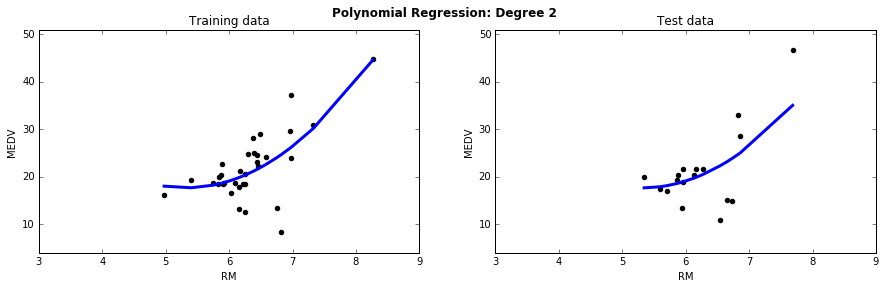

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Reshaping train and test data
train = np.array(boston_X_train).reshape(len(boston_X_train),1)
test = np.array(boston_X_test).reshape(len(boston_X_test),1)

# Fitting model with degree 2  MEDV ~ logit + RM + RM^2
poly = PolynomialFeatures(degree=2)
X_train_= poly.fit_transform(train)
X_test_= poly.fit_transform(test)

clf = linear_model.LinearRegression()
clf.fit(X_train_, boston_y_train.reshape(len(boston_y_train),1))

# Plot outputs
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Polynomial Regression: Degree 2',fontweight='bold', fontsize = 12)
plt.subplot(121)
plt.scatter(boston_X_train, boston_y_train,  color='black')
plt.plot(boston_X_train, clf.predict(X_train_), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Training data')
plt.axis([3,9, 4,51])

plt.subplot(122)
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, clf.predict(X_test_), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Test data')
plt.axis([3,9, 4,51])

plt.show()

### Polynomial Regression: Degree 5

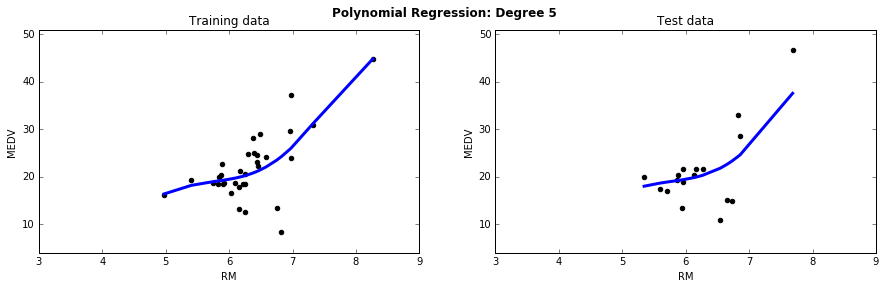

In [7]:
from sklearn.preprocessing import PolynomialFeatures
degree = 5
# Training a model with Degree 10  MEDV ~ logit + RM + RM^2 + RM^3 + RM^4 + RM^5
poly = PolynomialFeatures(degree=degree)
X_train_= poly.fit_transform(np.array(train))
X_test_= poly.fit_transform(test)

clf = linear_model.LinearRegression()
clf.fit(X_train_, boston_y_train.reshape(len(boston_y_train),1))

# Plot outputs
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Polynomial Regression: Degree ' + str(degree), fontweight='bold', fontsize = 12)
plt.subplot(121)
plt.scatter(boston_X_train, boston_y_train,  color='black')
plt.plot(boston_X_train, clf.predict(X_train_), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Training data')
plt.axis([3,9, 4,51])

plt.subplot(122)
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, clf.predict(X_test_), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Test data')
plt.axis([3,9, 4,51])

plt.show()

### Polynomial Regression: Degree 10

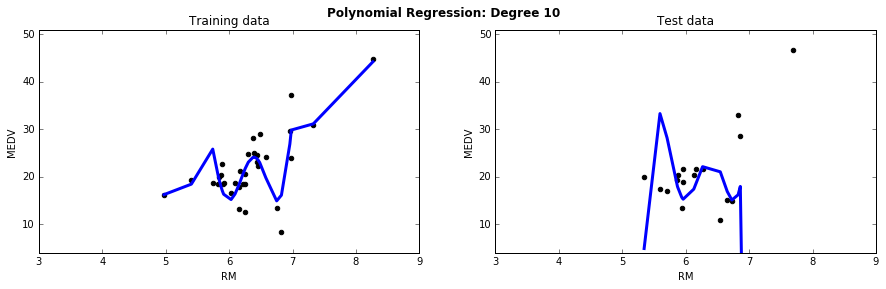

In [8]:
from sklearn.preprocessing import PolynomialFeatures
degree = 10
# Training model with degree = 35
poly = PolynomialFeatures(degree=degree)
X_train_= poly.fit_transform(np.array(train))
X_test_= poly.fit_transform(test)

clf = linear_model.LinearRegression()
clf.fit(X_train_, boston_y_train.reshape(len(boston_y_train),1))

# Plot outputs
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Polynomial Regression: Degree ' + str(degree), fontweight='bold', fontsize = 12)
plt.subplot(121)
plt.scatter(boston_X_train, boston_y_train,  color='black')
plt.plot(boston_X_train, clf.predict(X_train_), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Training data')
plt.axis([3,9, 4,51])

plt.subplot(122)
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, clf.predict(X_test_), color='blue',linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Test data')
plt.axis([3,9, 4,51])

plt.show()

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


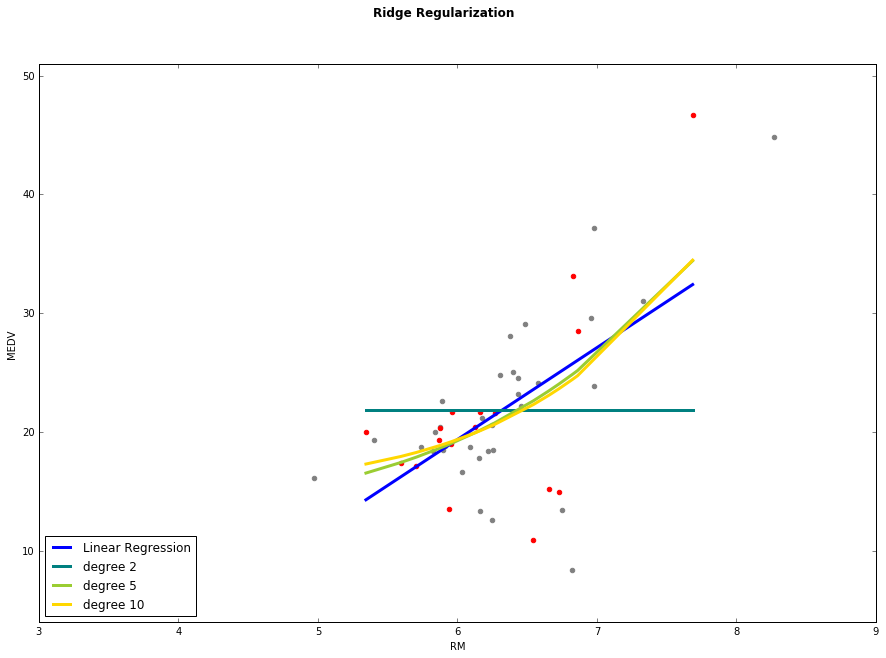

In [24]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
# make_pipeline do similar stuff to multiple model

fig = plt.figure(figsize=(15, 10))
plt.scatter(boston_X_train, boston_y_train,  color='gray')
plt.scatter(boston_X_test, boston_y_test,  color='red')
plt.xlabel('RM')
plt.ylabel('MEDV')
fig.suptitle('Ridge Regularization',fontweight='bold', fontsize = 12)
colors = ['teal', 'yellowgreen', 'gold']
plt.plot(boston_X_test, regr.predict(boston_X_test.reshape(len(boston_X_test),1)), color='blue', lw =3,
         label="Linear Regression")
for c, degree in enumerate([2,5,10]):
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=100)) #alpha is the penalty parameter
    #model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=100))
    model.fit(boston_X_train, boston_y_train)
    plt.plot(boston_X_test, model.predict(boston_X_test), color=colors[c],linewidth=3, label = "degree %d" % degree)

plt.legend(loc='lower left')
plt.axis([3,9, 4,51])

plt.show()
